## Install python autotime untuk menghitung waktu eksekusi

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.59 ms (started: 2021-01-09 23:28:39 +00:00)


## Mendowload dataset

In [ ]:
!wget https://raw.githubusercontent.com/Daffa404/KKB_Tugas/master/Final%20Project/lol_ranked_games.csv

--2021-01-09 23:28:39--  https://raw.githubusercontent.com/Daffa404/KKB_Tugas/master/Final%20Project/lol_ranked_games.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38679427 (37M) [text/plain]
Saving to: ‘lol_ranked_games.csv’

lol_ranked_games.cs 100%[===================>]  36.89M  59.6MB/s    in 0.6s    

2021-01-09 23:28:39 (59.6 MB/s) - ‘lol_ranked_games.csv’ saved [38679427/38679427]

time: 815 ms (started: 2021-01-09 23:28:39 +00:00)


## Import

In [ ]:
# Util
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.optimizers import Adam # Optimizer Adam
from keras.optimizers import SGD # Optimizer SGD
from keras.optimizers import Ftrl # Optimizer Ftrl
from keras.optimizers import RMSprop # Optimizer RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping

# Visualisasi
import matplotlib.pyplot as plt

# Count Runtime
import time

time: 2.77 s (started: 2021-01-09 23:28:43 +00:00)


## Persiapan Data Train dan Test

Load Dataset

In [ ]:
df = pd.read_csv('/content/lol_ranked_games.csv')
df.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,13,13,16,49,7,12


time: 943 ms (started: 2021-01-09 23:28:48 +00:00)


Mengambil Id terakhir untuk Id yang sama karena merupakan total dari Id sebelumnya

In [ ]:
dfo = df.copy()
df1 = dfo.groupby('gameId',as_index=False,sort=False).last()
df1.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,24,9426,11980,1.8,1,1,2,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,26,15,36,85,11,14
1,4438212663,1241000,1,20,9779,11356,2.2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,25,9,35,36,7,10
2,4402345420,1790000,1,30,4118,6593,0.8,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,36,25,47,59,16,19
3,4546761795,2065000,0,34,-3706,-10219,-1.2,1,1,0,1,0,1,0,3,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,33,26,55,64,14,24
4,4528965743,1307000,0,22,-15976,-10838,-1.4,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,1,9,27,9,26,3,9


time: 270 ms (started: 2021-01-09 23:28:52 +00:00)


Mengambil hanya kolom yang bertipe numerik saja

In [ ]:
numeric = []
for col in df.drop(columns=['gameId']).columns:
  print(df[col].dtypes)
  if df[col].dtypes != 'object':
    numeric.append(col)
numeric

int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


['gameDuration',
 'hasWon',
 'frame',
 'goldDiff',
 'expDiff',
 'champLevelDiff',
 'isFirstTower',
 'isFirstBlood',
 'killedFireDrake',
 'killedWaterDrake',
 'killedAirDrake',
 'killedEarthDrake',
 'killedElderDrake',
 'lostFireDrake',
 'lostWaterDrake',
 'lostAirDrake',
 'lostEarthDrake',
 'lostElderDrake',
 'killedBaronNashor',
 'lostBaronNashor',
 'killedRiftHerald',
 'lostRiftHerald',
 'destroyedTopInhibitor',
 'destroyedMidInhibitor',
 'destroyedBotInhibitor',
 'lostTopInhibitor',
 'lostMidInhibitor',
 'lostBotInhibitor',
 'destroyedTopNexusTurret',
 'destroyedMidNexusTurret',
 'destroyedBotNexusTurret',
 'lostTopNexusTurret',
 'lostMidNexusTurret',
 'lostBotNexusTurret',
 'destroyedTopBaseTurret',
 'destroyedMidBaseTurret',
 'destroyedBotBaseTurret',
 'lostTopBaseTurret',
 'lostMidBaseTurret',
 'lostBotBaseTurret',
 'destroyedTopInnerTurret',
 'destroyedMidInnerTurret',
 'destroyedBotInnerTurret',
 'lostTopInnerTurret',
 'lostMidInnerTurret',
 'lostBotInnerTurret',
 'destroyedTop

time: 48.2 ms (started: 2021-01-09 23:28:55 +00:00)


Membagi data menjadi fitur (X) dan target (y)

Kami tidak menggunakan semua fitur, dan hanya menggunakan yang paling berpengaruh saja dalam suatu kemenangan

In [ ]:
X = df1[['goldDiff', 'expDiff','champLevelDiff','killedFireDrake','killedWaterDrake','killedAirDrake','killedEarthDrake','killedElderDrake','lostFireDrake','lostWaterDrake','lostAirDrake','lostEarthDrake','lostElderDrake','killedBaronNashor','lostBaronNashor','killedRiftHerald','lostRiftHerald','kills','deaths','assists','wardsPlaced','wardsDestroyed','wardsLost']] # Features
y = df1[['hasWon']] # Target variable

time: 5.46 ms (started: 2021-01-09 23:29:01 +00:00)


Melakukan normalisasi pada setiap fitur

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.68882471, 0.58668919, 0.74358974, ..., 0.08110781, 0.09565217,
        0.13084112],
       [0.69666741, 0.57845569, 0.79487179, ..., 0.03264095, 0.06086957,
        0.09345794],
       [0.57089536, 0.51560933, 0.61538462, ..., 0.0553907 , 0.13913043,
        0.17757009],
       ...,
       [0.51277494, 0.37702539, 0.48717949, ..., 0.30761622, 0.16521739,
        0.14953271],
       [0.29004666, 0.25051459, 0.30769231, ..., 0.07616222, 0.15652174,
        0.1588785 ],
       [0.35496556, 0.32840291, 0.35897436, ..., 0.02769535, 0.05217391,
        0.09345794]])

time: 18.4 ms (started: 2021-01-09 23:29:05 +00:00)


Membagi data menjadi train dan test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

22420 22420 2492 2492
time: 31 ms (started: 2021-01-09 23:51:33 +00:00)


Mengubah dataframe menjadi 3 dimensi

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train_reshaped.shape[1:3]

(23, 1)

time: 4.72 ms (started: 2021-01-09 23:51:35 +00:00)


In [ ]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test_reshaped.shape

(2492, 23, 1)

time: 4.5 ms (started: 2021-01-09 23:51:37 +00:00)


Menambahkan conv layer 1, conv layer 2, dan output layer pada CNN

In [ ]:
model = Sequential()

# Hidden Layer 1
model.add(Conv1D(32, 4, input_shape=X_train_reshaped.shape[1:3], activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(1))

# Hidden Layer 2
model.add(Conv1D(16, 2, activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(1))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 20, 32)            160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 32)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 19, 16)            1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 19, 16)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 19, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 304)              

## Optimizer

Di Run salah satu untuk optimizer nya

Menggunakan SGD optimizer

Stochastic Gradient Descent (SGD) bekerja dengan menjaga satu learning rate untuk semua weight update dan learning rate tidak berubah saat training

In [ ]:
optimizer = SGD(
    learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")

time: 1.31 ms (started: 2021-01-09 23:51:43 +00:00)


Menggunakan Adam optimizer

Adam bekerja untuk memberikan optimization algorithm yang dapat menangani sparse gradients pada noisy problem

In [ ]:
optimizer = Adam(learning_rate=0.01, name="Adam")

Menggunakan RMSprop

Root Mean Square Propagation (RMSProp) bekerja dengan mempertahankan per-parameter learning rate yang diadaptasi berdasarkan average of recent magnitudes of the gradient untuk weight (mis. seberapa cepat ia berubah). Ini berarti algoritme berfungsi dengan baik pada masalah online dan non-stasioner (mis. noisy/berisik)

In [ ]:
optimizer = RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)

time: 1.61 ms (started: 2021-01-09 23:29:32 +00:00)


Menggunkan Ftrl optimizer

In [ ]:
optimizer = Ftrl(
    learning_rate=0.01,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.0,
    beta=0.0,
)

##Early Stopping

Menambahkan early stopping untuk menghentikan iterasi ketika setelah beberapa iterasi akurasi tidak bertambah

In [ ]:
%%time
early_stopping_monitor = EarlyStopping(
    monitor='accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics='accuracy')

history = model.fit(X_train_reshaped, y_train,
          epochs=1000, 
          verbose=1,
          validation_data=(X_test_reshaped, y_test),
          callbacks=[early_stopping_monitor])

Epoch 1/1000
701/701 [==============================] - 3s 3ms/step - loss: 0.0798 - accuracy: 0.9722 - val_loss: 0.0705 - val_accuracy: 0.9739
Epoch 2/1000
701/701 [==============================] - 2s 3ms/step - loss: 0.0694 - accuracy: 0.9753 - val_loss: 0.0704 - val_accuracy: 0.9739
Epoch 3/1000
701/701 [==============================] - 2s 3ms/step - loss: 0.0732 - accuracy: 0.9733 - val_loss: 0.0705 - val_accuracy: 0.9735
Epoch 4/1000
701/701 [==============================] - 2s 3ms/step - loss: 0.0792 - accuracy: 0.9737 - val_loss: 0.0705 - val_accuracy: 0.9743
Epoch 5/1000
701/701 [==============================] - 2s 3ms/step - loss: 0.0763 - accuracy: 0.9740 - val_loss: 0.0705 - val_accuracy: 0.9735
Epoch 6/1000
701/701 [==============================] - 2s 3ms/step - loss: 0.0800 - accuracy: 0.9714 - val_loss: 0.0704 - val_accuracy: 0.9739
Epoch 7/1000
701/701 [==============================] - 2s 3ms/step - loss: 0.0776 - accuracy: 0.9724 - val_loss: 0.0704 - val_accuracy:

##Visualisasi

Visualisasi nilai loss dari setiap epoch

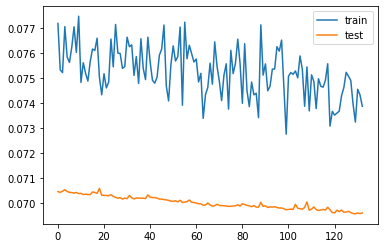

time: 188 ms (started: 2021-01-10 00:29:28 +00:00)


In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

##Akurasi

Akurasi Data Test

In [ ]:
preds = model.predict(X_test_reshaped)
preds = np.round(preds, 0).reshape(preds.shape[0])
acc = accuracy_score(y_test, preds)
acc

0.9735152487961477

time: 171 ms (started: 2021-01-10 00:29:33 +00:00)


Akurasisi Data Train

In [ ]:
preds = model.predict(X_train_reshaped)
preds = np.round(preds, 0).reshape(preds.shape[0])
acc = accuracy_score(y_train, preds)
acc

0.976271186440678

time: 609 ms (started: 2021-01-10 00:29:36 +00:00)
